<a href="https://colab.research.google.com/github/engrvitalis/NAU/blob/main/Copy_of_Achike_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Uploading the needed *files*

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving welding_data_by_properties.csv to welding_data_by_properties.csv
Saving welding_data_by_welding_types.csv to welding_data_by_welding_types.csv


Print out names of uploaded files.

In [ ]:
# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

Import relevant packages.

In [ ]:
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('welding_data_by_properties.csv')
df.head()

,current,voltage,welding_speed,plate_thickness,property,saw,smaw,gmaw,gtaw
0,100,24,90,6,heat_input,1600.0,1280.0,1280.0,960.0
1,100,28,120,8,heat_input,1400.0,1120.0,1120.0,840.0
2,100,32,150,10,heat_input,1280.0,1024.0,1024.0,768.0
3,130,24,120,10,heat_input,1560.0,1248.0,1248.0,936.0
4,130,28,150,6,heat_input,1456.0,1165.0,1165.0,874.0


In [ ]:
df2 = pd.read_csv('welding_data_by_welding_types.csv')
df.head()

In [ ]:
for i in range(len(df.columns)):
  print(i)

0
1
2
3
4
5
6
7
8


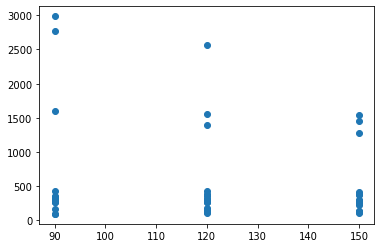

In [ ]:
plt.scatter(df.welding_speed, df.saw)

Generate the necessary variables for modelling.

In [ ]:
df = pd.read_excel("flexural_strength.xlsx")
X = df.iloc[:, 1:].to_numpy()
y = df.iloc[:, 0]
n_cols = X.shape[1]

Specify model architecture.

In [ ]:
model = Sequential()
model.add(Dense(10, activation='relu', input_shape = (n_cols,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

Compiling and fitting a model.

In [ ]:
early_stopping_monitor = EarlyStopping(patience=3)

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history = model.fit(X, y, validation_split=0.3, epochs=100, callbacks=[early_stopping_monitor])

Epoch 1/100
1/1 [==============================] - 1s 900ms/step - loss: 74082.9219 - accuracy: 0.0000e+00 - val_loss: 69304.3047 - val_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 48ms/step - loss: 73620.4531 - accuracy: 0.0000e+00 - val_loss: 68866.8359 - val_accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 48ms/step - loss: 73158.1172 - accuracy: 0.0000e+00 - val_loss: 68414.6484 - val_accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 48ms/step - loss: 72692.5234 - accuracy: 0.0000e+00 - val_loss: 67953.2734 - val_accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 53ms/step - loss: 72223.1562 - accuracy: 0.0000e+00 - val_loss: 67491.4297 - val_accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 51ms/step - loss: 71753.2422 - accuracy: 0.0000e+00 - val_loss: 67029.1719 - val_accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 62ms/step

Visualization

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

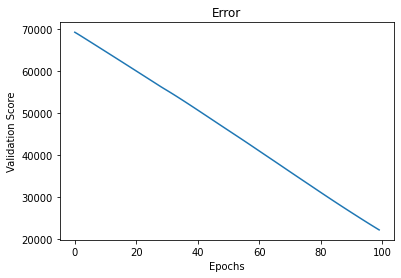

In [ ]:
plt.plot(history.history['val_loss'])
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Validation Score')
plt.show()

In [ ]:
df.head()

,flexural_strength,current,voltage,speed,thickness,type
0,293.2,130,28,150,6,2
1,268.5,160,32,120,6,0
2,302.5,160,24,150,8,1
3,312.6,130,24,120,10,2
4,345.0,130,24,120,10,1


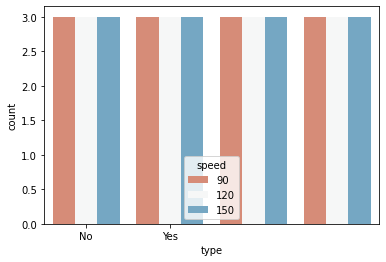

In [ ]:
import seaborn as sns

plt.figure()
sns.countplot(x='type', hue='speed', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()